In [89]:
import keras 
from keras.datasets import mnist
import time
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [90]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [93]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])


In [94]:
history = model1.fit(X_train,y_train,epochs=64,batch_size=100,validation_data=(X_test,y_test))
model1.save('my_model1.h5')
model1.evaluate(X_test,y_test)

Epoch 1/64
600/600 [==============================] - 2s 2ms/step - loss: 0.3849 - acc: 0.8950 - val_loss: 0.2121 - val_acc: 0.9391
Epoch 2/64
600/600 [==============================] - 1s 2ms/step - loss: 0.1884 - acc: 0.9462 - val_loss: 0.1631 - val_acc: 0.9524
Epoch 3/64
600/600 [==============================] - 1s 2ms/step - loss: 0.1435 - acc: 0.9581 - val_loss: 0.1343 - val_acc: 0.9601
Epoch 4/64
600/600 [==============================] - 1s 2ms/step - loss: 0.1163 - acc: 0.9663 - val_loss: 0.1177 - val_acc: 0.9655
Epoch 5/64
600/600 [==============================] - 1s 2ms/step - loss: 0.0970 - acc: 0.9716 - val_loss: 0.1084 - val_acc: 0.9665
Epoch 6/64
600/600 [==============================] - 1s 2ms/step - loss: 0.0824 - acc: 0.9760 - val_loss: 0.0979 - val_acc: 0.9704
Epoch 7/64
600/600 [==============================] - 1s 2ms/step - loss: 0.0720 - acc: 0.9788 - val_loss: 0.0939 - val_acc: 0.9717
Epoch 8/64
600/600 [==============================] - 1s 2ms/step - loss: 0.

[0.15609513223171234, 0.9747999906539917]

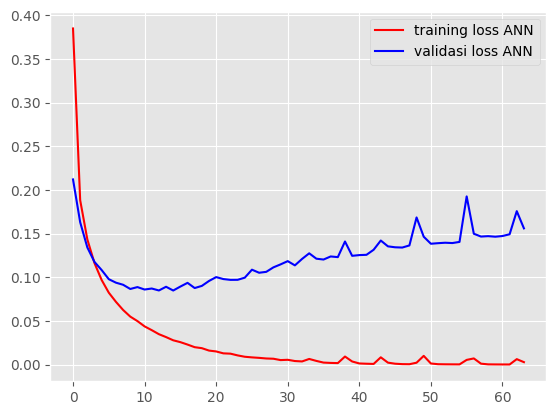

In [95]:
import matplotlib.pyplot as plt
epochs = range(64)
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']
plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

In [96]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_86 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 1568)              0         
                                                                 
 dense_22 (Dense)            (None, 64)              

In [97]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history = model2.fit(X_train,y_train,epochs=64,batch_size=100,validation_data=(X_test,y_test))
model2.save('my_model2.h5')
model2.evaluate(X_test,y_test)

Epoch 1/64
600/600 [==============================] - 3s 3ms/step - loss: 0.2249 - acc: 0.9335 - val_loss: 0.0645 - val_acc: 0.9796
Epoch 2/64
600/600 [==============================] - 2s 3ms/step - loss: 0.0635 - acc: 0.9808 - val_loss: 0.0445 - val_acc: 0.9855
Epoch 3/64
600/600 [==============================] - 2s 3ms/step - loss: 0.0447 - acc: 0.9860 - val_loss: 0.0421 - val_acc: 0.9864
Epoch 4/64
600/600 [==============================] - 2s 3ms/step - loss: 0.0351 - acc: 0.9892 - val_loss: 0.0411 - val_acc: 0.9868
Epoch 5/64
600/600 [==============================] - 2s 3ms/step - loss: 0.0274 - acc: 0.9916 - val_loss: 0.0346 - val_acc: 0.9891
Epoch 6/64
600/600 [==============================] - 2s 3ms/step - loss: 0.0243 - acc: 0.9923 - val_loss: 0.0303 - val_acc: 0.9894
Epoch 7/64
600/600 [==============================] - 2s 3ms/step - loss: 0.0185 - acc: 0.9938 - val_loss: 0.0306 - val_acc: 0.9903
Epoch 8/64
600/600 [==============================] - 2s 3ms/step - loss: 0.

[0.0695781409740448, 0.9919999837875366]

In [19]:
import numpy as np
from keras.models import load_model
model_simpan2 = load_model('my_model2.h5')
pred = model_simpan2.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 [==============================] - 0s 1ms/step
label actual: 3
label prediction: 3


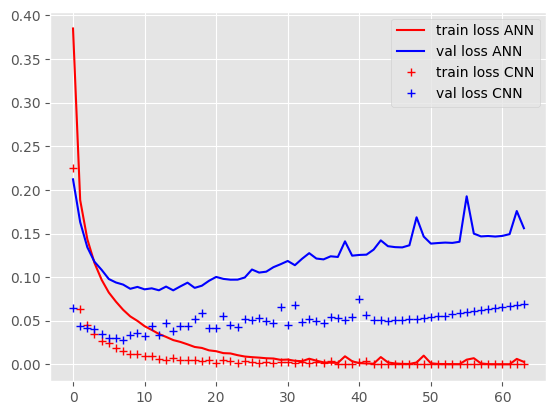

In [98]:
import matplotlib.pyplot as plt
epochs = range(64)

plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']
plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()

# Varian 2

In [99]:
model3 = Sequential()
model3.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model3.add(MaxPooling2D(2,2))
model3.add(keras.layers.GlobalAveragePooling2D())
model3.add(Dense(10,activation='softmax'))
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_87 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_88 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 global_average_pooling2d_3  (None, 128)               0         
  (GlobalAveragePooling2D)                                       
                                                     

In [100]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history2 = model3.fit(X_train,y_train,epochs=64,batch_size=100,validation_data=(X_test,y_test))
model3.save('my_model2.h5')
model3.evaluate(X_test,y_test)

Epoch 1/64
600/600 [==============================] - 3s 5ms/step - loss: 1.1861 - acc: 0.6111 - val_loss: 0.6705 - val_acc: 0.7882
Epoch 2/64
600/600 [==============================] - 3s 5ms/step - loss: 0.5189 - acc: 0.8531 - val_loss: 0.4000 - val_acc: 0.8832
Epoch 3/64
600/600 [==============================] - 3s 4ms/step - loss: 0.3535 - acc: 0.8993 - val_loss: 0.2902 - val_acc: 0.9168
Epoch 4/64
600/600 [==============================] - 3s 5ms/step - loss: 0.2800 - acc: 0.9193 - val_loss: 0.2456 - val_acc: 0.9278
Epoch 5/64
600/600 [==============================] - 3s 5ms/step - loss: 0.2401 - acc: 0.9295 - val_loss: 0.2365 - val_acc: 0.9269
Epoch 6/64
600/600 [==============================] - 3s 5ms/step - loss: 0.2177 - acc: 0.9349 - val_loss: 0.1751 - val_acc: 0.9475
Epoch 7/64
600/600 [==============================] - 3s 5ms/step - loss: 0.1949 - acc: 0.9425 - val_loss: 0.1761 - val_acc: 0.9475
Epoch 8/64
600/600 [==============================] - 3s 5ms/step - loss: 0.

[0.06024725362658501, 0.980400025844574]

In [101]:
pred = model3.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 [==============================] - 0s 1ms/step
label actual: 3
label prediction: 3


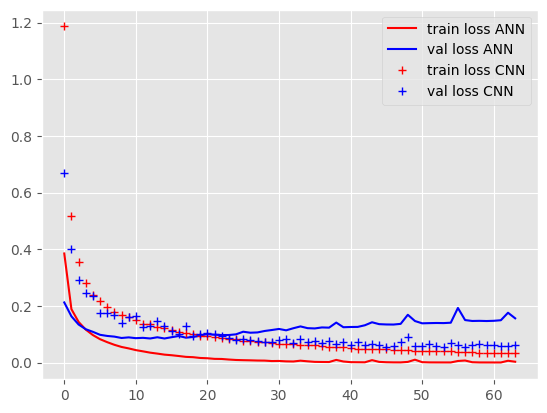

In [102]:
import matplotlib.pyplot as plt
epochs = range(64)

plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()

In [103]:
def save_plot_loss(H):
    print("min val_loss: ", min(H.history["val_loss"]))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H.history["loss"], label="train_loss")
    plt.plot(H.history["val_loss"], label="val_loss")

    plt.title("Training Loss ")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    # plt.savefig(path)

    
def save_plot_acc(H):
    print("max val_accuracy: " , max(H.history["val_acc"]))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(H.history["acc"], label="train_acc")
    plt.plot(H.history["val_acc"], label="val_acc")
    plt.title(" Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()
    # plt.savefig(path)

max val_accuracy:  0.9824000000953674


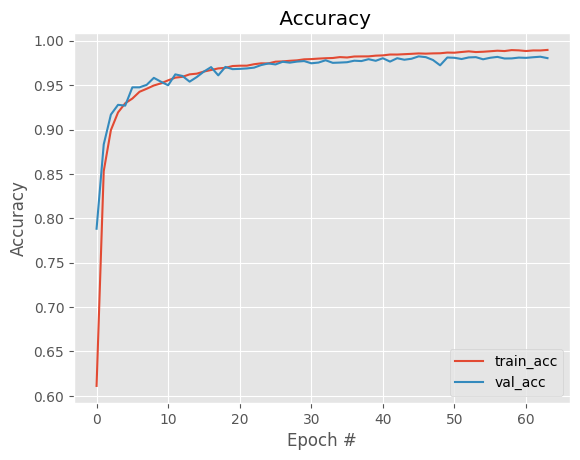

In [104]:
save_plot_acc(history2)

# Varian 3
512 -> 512 -> 512 -> dropout -> GlobalAveragePooling2D

In [105]:
model4 = Sequential()
model4.add(Conv2D(512,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model4.add(MaxPooling2D(2,2))
model4.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model4.add(MaxPooling2D(2,2))
model4.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model4.add(MaxPooling2D(2,2))
model4.add(keras.layers.Dropout(0.2))
model4.add(keras.layers.GlobalAveragePooling2D())
model4.add(Dense(10,activation='softmax'))
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_89 (Conv2D)          (None, 28, 28, 512)       5120      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 512)       0         
 ng2D)                                                           
                                                                 
 conv2d_90 (Conv2D)          (None, 14, 14, 512)       2359808   
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 7, 7, 512)         0         
 ng2D)                                                           
                                                                 
 conv2d_91 (Conv2D)          (None, 7, 7, 512)         2359808   
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 3, 3, 512)       

In [106]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history2 = model4.fit(X_train,y_train,epochs=64,batch_size=100,validation_data=(X_test,y_test))
model4.save('my_model2.h5')
model4.evaluate(X_test,y_test)

Epoch 1/64


2024-11-01 03:09:21.870018: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_13/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


600/600 [==============================] - 15s 24ms/step - loss: 0.2663 - acc: 0.9141 - val_loss: 0.0733 - val_acc: 0.9776
Epoch 2/64
600/600 [==============================] - 14s 24ms/step - loss: 0.0604 - acc: 0.9808 - val_loss: 0.0473 - val_acc: 0.9837
Epoch 3/64
600/600 [==============================] - 14s 24ms/step - loss: 0.0419 - acc: 0.9875 - val_loss: 0.0425 - val_acc: 0.9850
Epoch 4/64
600/600 [==============================] - 15s 24ms/step - loss: 0.0321 - acc: 0.9899 - val_loss: 0.0370 - val_acc: 0.9883
Epoch 5/64
600/600 [==============================] - 15s 25ms/step - loss: 0.0279 - acc: 0.9910 - val_loss: 0.0228 - val_acc: 0.9926
Epoch 6/64
600/600 [==============================] - 15s 24ms/step - loss: 0.0201 - acc: 0.9938 - val_loss: 0.0265 - val_acc: 0.9908
Epoch 7/64
600/600 [==============================] - 15s 25ms/step - loss: 0.0189 - acc: 0.9941 - val_loss: 0.0192 - val_acc: 0.9928
Epoch 8/64
600/600 [==============================] - 15s 25ms/step - los

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 4ms/step - loss: 0.0418 - acc: 0.9939


[0.041812777519226074, 0.9939000010490417]

In [107]:
pred = model4.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 [==============================] - 1s 3ms/step
label actual: 3
label prediction: 3


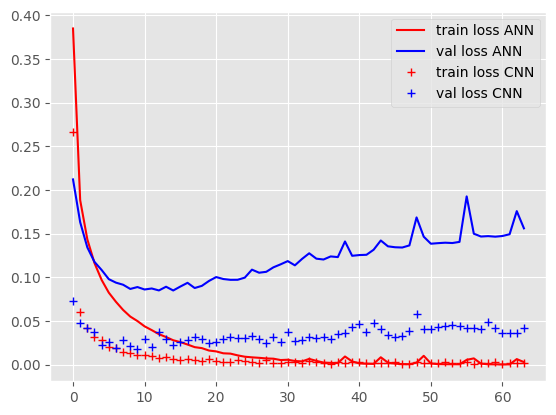

In [111]:
import matplotlib.pyplot as plt
epochs = range(64)


plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()

max val_accuracy:  0.9944000244140625


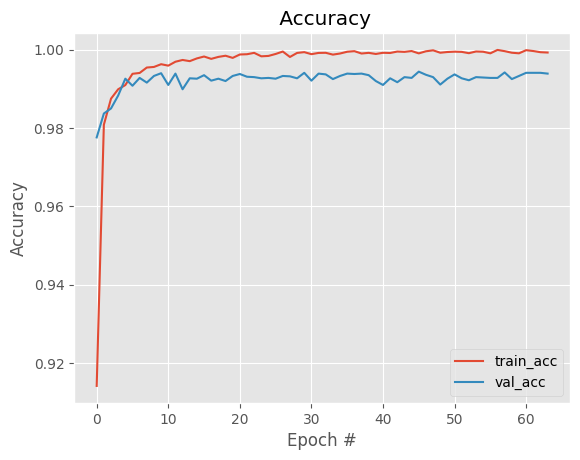

In [112]:
save_plot_acc(history2)

# Varian 4 
Resnet34 (https://arxiv.org/pdf/1512.03385)
![RESNET](resnet.png) 
<br>
ref: https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow/

In [113]:
def identity_block(x, filter):

    x_skip = x

    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)

    x = tf.keras.layers.Add()([x, x_skip]) # Residual   
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [114]:
def convolutional_block(x, filter):
    x_skip = x

    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)

    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)

    x = tf.keras.layers.Add()([x, x_skip])  # Residual    
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [115]:

x_input = tf.keras.layers.Input((28,28,1))
x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)

x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

block_layers = [3, 4, 6, 3]
filter_size = 64
for i in range(4):
    # conv2_x,. ..., conv5_x
    # setiap layer diawali convolutional 
    if i == 0:
        for j in range(block_layers[i]):
            x = identity_block(x, filter_size)
    else:
        filter_size = filter_size*2
        x = convolutional_block(x, filter_size)
        for j in range(block_layers[i] - 1):
            x = identity_block(x, filter_size)

x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(10, activation = 'softmax')(x)
model_resnet = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")    

model_resnet.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 34, 34, 1)            0         ['input_5[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv2d_92 (Conv2D)          (None, 17, 17, 64)           3200      ['zero_padding2d_2[0][0]']    
                                                                                                  
 batch_normalization_66 (Ba  (None, 17, 17, 64)           256       ['conv2d_92[0][0]']    

In [116]:
model_resnet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history2 = model_resnet.fit(X_train,y_train,epochs=64,batch_size=100,validation_data=(X_test,y_test))
model_resnet.save('my_model2.h5')
model_resnet.evaluate(X_test,y_test)

Epoch 1/64
600/600 [==============================] - 28s 24ms/step - loss: 0.2103 - acc: 0.9413 - val_loss: 0.0766 - val_acc: 0.9776
Epoch 2/64
600/600 [==============================] - 14s 23ms/step - loss: 0.0662 - acc: 0.9814 - val_loss: 0.0993 - val_acc: 0.9739
Epoch 3/64
600/600 [==============================] - 14s 24ms/step - loss: 0.0475 - acc: 0.9870 - val_loss: 0.0497 - val_acc: 0.9858
Epoch 4/64
600/600 [==============================] - 14s 24ms/step - loss: 0.0406 - acc: 0.9888 - val_loss: 0.0518 - val_acc: 0.9875
Epoch 5/64
600/600 [==============================] - 15s 25ms/step - loss: 0.0343 - acc: 0.9910 - val_loss: 0.0482 - val_acc: 0.9871
Epoch 6/64
600/600 [==============================] - 15s 25ms/step - loss: 0.0332 - acc: 0.9909 - val_loss: 0.0496 - val_acc: 0.9874
Epoch 7/64
600/600 [==============================] - 15s 25ms/step - loss: 0.0290 - acc: 0.9916 - val_loss: 0.0902 - val_acc: 0.9731
Epoch 8/64
600/600 [==============================] - 14s 24ms

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 5ms/step - loss: 0.0368 - acc: 0.9928


[0.036829523742198944, 0.9927999973297119]

In [117]:
pred = model_resnet.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 [==============================] - 2s 4ms/step
label actual: 3
label prediction: 3


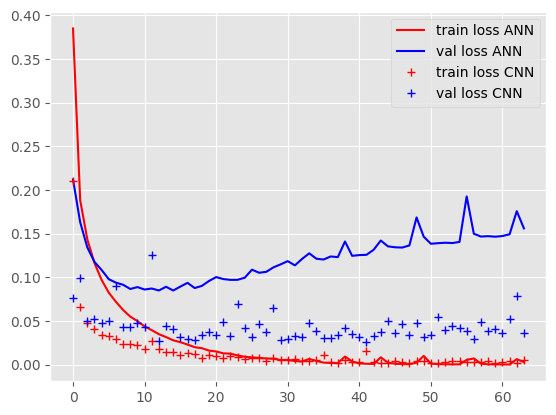

In [118]:
import matplotlib.pyplot as plt
epochs = range(64)

plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()

max val_accuracy:  0.9922000169754028


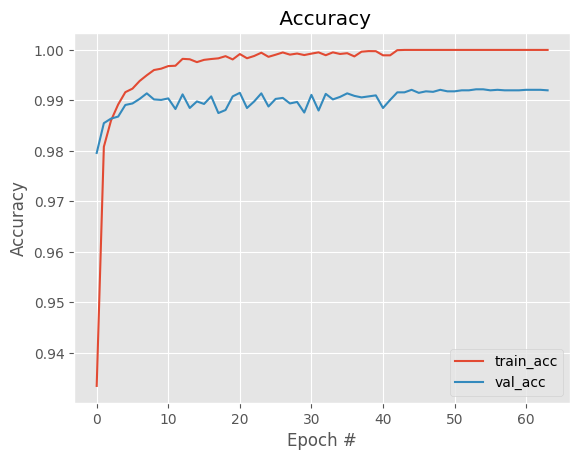

In [119]:
save_plot_acc(history)

In [140]:
def labels_confusion_matrix(X_test, y_test):
    folder_path="./test_data"
    
    real = []
    predicted= []
    
    i = 0 
    for one_test in X_test:
        true = y_test[i]
        one_test = np.expand_dims(one_test, axis=0) 
        prediction = model_resnet.predict(one_test, verbose=0)
        index = np.argmax(prediction)
        
        predicted.append(index)
        
        real.append(true)
        i += 1
            
    return (real,predicted)

In [141]:

y_true,y_pred= labels_confusion_matrix(X_test, y_test)


In [150]:
print(y_pred[:10])
y_true = tf.argmax(y_true, axis=1).numpy()


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [157]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

In [158]:
def print_confusion_matrix(real,predicted):

    cmap="viridis"
    cm_plot_labels = [i for i in range(10)]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.1)
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm, annot=True,cmap=cmap) 

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

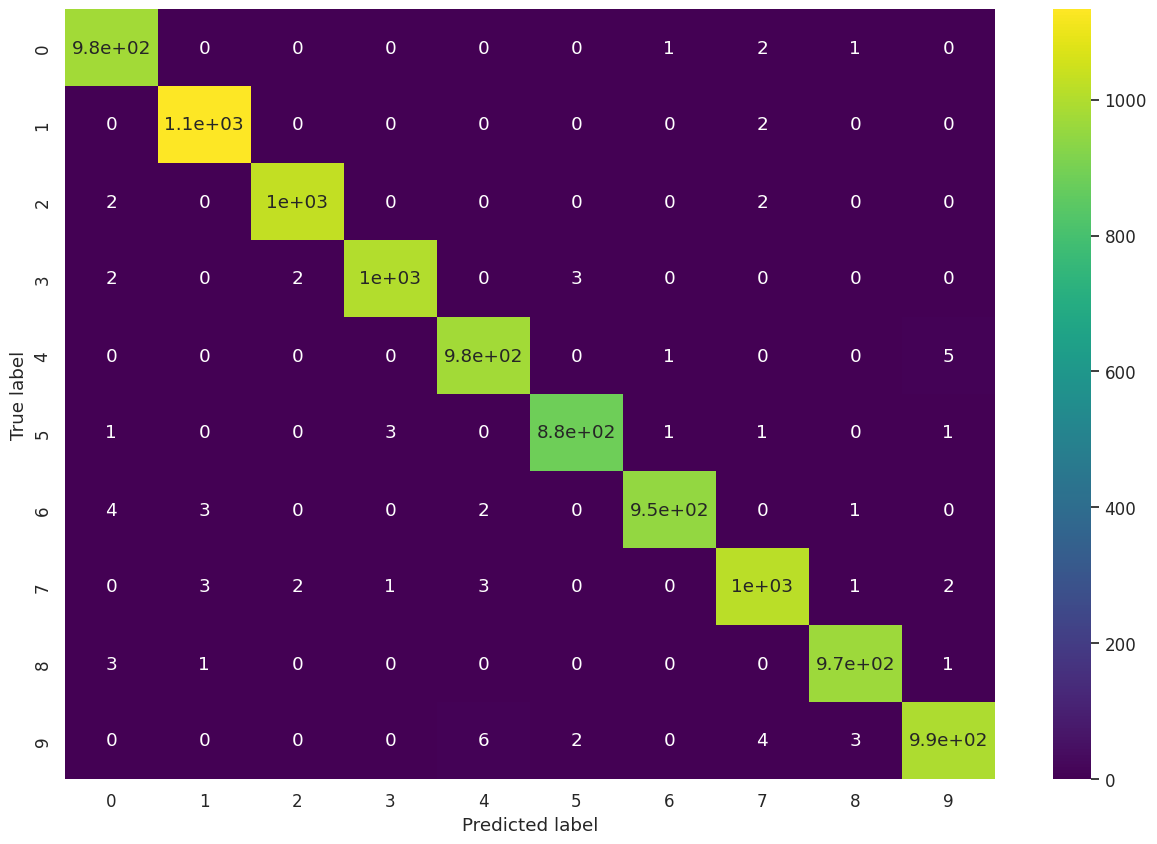

In [159]:
print_confusion_matrix(y_true,y_pred)

In [161]:
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [160]:
pred = model4.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 [==============================] - 1s 3ms/step
label actual: 3
label prediction: 3
